# Circular Arc Airfoils for XFoil Tests

After reading through a Master's Thesis that explored thin airfoils defined by a BSpline curve, I decided to adapt the technique presented and build a circular arc airfoil routine that will generate airfoils with an arbitrary camber and thickness. XFoil cannot deal with super thin airfoils, and the Thesis added a round leading edge and a parabolic thickness distribution at the trailing edge. Both of these additions helped XFoil converge on solutions during analysis.

In this note, we will build the basic routines needed to build the Python class. At the end of the note, we will import the new class and run tests on a sample airfoil so we can compare results with the data we have already presented.

## Airfoil Basics

The airfoils we will produce are normalized to a chord of length one. The camber will be specified as a percentage of this chord, as will be the thickness used in analysis. These two data items can fully define the circular arc that will form the camber line. 

In [1]:
import math

In [2]:
chord = 1.0      # includes rounded nose
camber = 5.0     # percentage of chord
thickness = 1.0  # percentage of chord

t = thickness / 100.0
c = camber / 100.0
ch = chord - t/2.0   # shorten the chord to allow for the round nose

radius = ch**2 / (8.0*c) + c/2
theta = 2*math.atan(2*c/ch)
xc = t/2 + ch/2
yc = c - radius
print(radius, theta*180/math.pi, xc, yc)

2.5000625 11.478196996179214 0.5025 -2.4500625


In [3]:
print(radius - radius * math.cos(theta))

0.050000000000000266


In [4]:
print(2 * radius * math.sin(theta))

0.9950000000000001


In [5]:
nx = 125
sweep = 2 * theta
da = sweep/nx
r = t/2
xu = []
xm = []
xl = []
yu = []
ym = []
yl = []
aa = r/25 - r
cc = r

for i in range(nx+1):  
    angle = theta - i * da
    x = xc - radius * math.sin(angle)
    y = yc + radius * math.cos(angle)
    if i > nx-5:
        j = nx - 5 - i
        xx = j*0.2
        tt = aa*xx**2 + cc
    else:
        tt = r
    dx = tt * math.sin(angle)
    dy = tt * math.cos(angle)
    xu.append(x - dx)
    xm.append(x)
    xl.append(x + dx)
    yu.append(y + dy)
    ym.append(y)
    yl.append(y - dy)

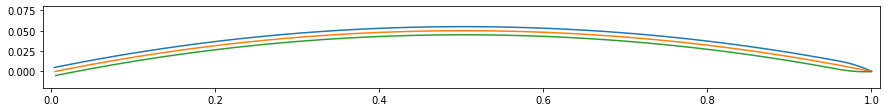

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,1.5))
plt.xlim(-0.01, 1.01)
plt.ylim(-0.02, 0.08)
plt.plot(xu,yu)
plt.plot(xm,ym)
plt.plot(xl,yl)
plt.show()

## Leading edge

In [7]:
maxLEangle = 12
nptot = round(180/maxLEangle)
nptot = round(180/maxLEangle)
np1 = round(((math.pi/2 - theta) / math.pi) * nptot)
np2 = round(((math.pi/2 + theta) / math.pi) * nptot)
print(nptot, np1, np2)


15 7 8


In [8]:
# generate top LE points
alpha = math.pi/2 + theta
dalpha = (math.pi/2 - theta)/np1
xule = []
yule = []
xlle = []
ylle = []

x = xm[0]
y = ym[0]

for i in range(np1+1):
    xule.append(x + r * math.cos(alpha))
    yule.append(y + r * math.sin(alpha))
    alpha += dalpha

# generate bottom LE points
alpha = 3*math.pi/2 + theta
dalpha = (math.pi/2 + theta)/np2
for i in range(np2+1):
    xlle.append(x + r * math.cos(alpha))
    ylle.append(y + r * math.sin(alpha))
    alpha -= dalpha

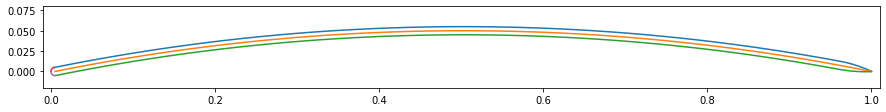

In [9]:
plt.figure(figsize=(15,1.5))
plt.xlim(-0.01, 1.01)
plt.ylim(-0.02, 0.08)
plt.plot(xu,yu)
plt.plot(xm,ym)
plt.plot(xl,yl)
plt.plot(xule,yule)
plt.plot(xlle,ylle)
plt.show()

In [10]:
polar = """ -4.000  -0.1516   0.07432   0.03929  -0.0304
-2.000  -0.1349   0.06277   0.02930  -0.0260
0.000   0.2128   0.06014   0.01681  -0.0889
2.000   0.4230   0.06382   0.01235  -0.0893
4.000   0.5911   0.06995   0.01786  -0.0846
6.000   0.7400   0.07981   0.03185  -0.0794
8.000   0.7988   0.10643   0.06473  -0.0909
10.000   0.8202   0.14239   0.10479  -0.1116
12.000   0.8773   0.17397   0.14703  -0.1282
14.000   0.9462   0.20389   0.19439  -0.1441
16.000   1.0182   0.23320   0.24733  -0.1601"""

In [12]:
A = []
CL = []
CD = []
CDp = []
CM = []
lines = polar.split('\n')
for l in lines:
    print(l)
    
    a,cl,cd,cdp,cm = l.split()
    A.append(float(a))
    CL.append(float(cl))
    CD.append(float(cd))
    CDp.append(float(cdp))
    CM.append(float(cm))
    
print(A,CL,CD,CDp,CM)

 -4.000  -0.1516   0.07432   0.03929  -0.0304
-2.000  -0.1349   0.06277   0.02930  -0.0260
0.000   0.2128   0.06014   0.01681  -0.0889
2.000   0.4230   0.06382   0.01235  -0.0893
4.000   0.5911   0.06995   0.01786  -0.0846
6.000   0.7400   0.07981   0.03185  -0.0794
8.000   0.7988   0.10643   0.06473  -0.0909
10.000   0.8202   0.14239   0.10479  -0.1116
12.000   0.8773   0.17397   0.14703  -0.1282
14.000   0.9462   0.20389   0.19439  -0.1441
16.000   1.0182   0.23320   0.24733  -0.1601
[-4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0] [-0.1516, -0.1349, 0.2128, 0.423, 0.5911, 0.74, 0.7988, 0.8202, 0.8773, 0.9462, 1.0182] [0.07432, 0.06277, 0.06014, 0.06382, 0.06995, 0.07981, 0.10643, 0.14239, 0.17397, 0.20389, 0.2332] [0.03929, 0.0293, 0.01681, 0.01235, 0.01786, 0.03185, 0.06473, 0.10479, 0.14703, 0.19439, 0.24733] [-0.0304, -0.026, -0.0889, -0.0893, -0.0846, -0.0794, -0.0909, -0.1116, -0.1282, -0.1441, -0.1601]


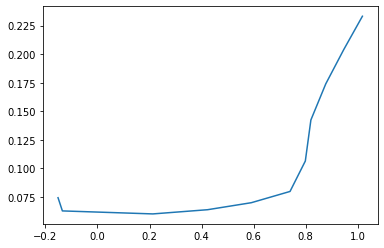

In [13]:
plt.plot(CL,CD)
plt.show()

## Flat Plate Airfoil

For the propeller analysis, we will need a flat plate airfoil. Once again, to keep **xfoil** happy, we will generate this airfoil using a round leading edge and a parabolic arc trailing edge as we used for the circular arc airfoil presented previously.

In [14]:
chord = 1.0      # includes rounded nose
thickness = 1.0  # percentage of chord

t = thickness / 100.0
ch = chord - t/2.0   # shorten the chord to allow for the round nose

xc = t/2 + ch/2
yc = 0
print(xc, yc)

0.5025 0


In [73]:
nx = 125
dx = 1.0/nx
r = t/2

### Trailing edge parabolic arc

For the flat plate, the equation for the parabolic arc we will use for the trailing edge is this:

\begin{equation}
y = ax^2+b)
\end{equation}

With conditions:

\begin{equation}
x = 0, y = t/2
\end{equation}

\begin{equation}
x = 5dx, y = 0
\end{equation}

We will use **sympy** to generate equations for **a** and **b**

In [74]:
import sympy
tx, ty, tnx, tt, ta, tb = sympy.symbols('tx ty tnx tt ta tb')

eq1 = tt/2 - tb
eq2 = ta * 25*dx**2  + tb

eq3 = sympy.solve([eq1,eq2],[ta,tb])
eq3

{ta: -312.5*tt, tb: 0.5*tt}

Obviously, we did not really need **sympy** for this simple problem, but it is nice to be able to do things like this when your math is a bit rusty!

With these constants defined, we can generate the trailing edge curves as follows:

In [69]:
a = -312.5 * t
b = t/2
print(nx,a,b)

125 -3.125 0.005


In [84]:
xu = []
xm = []
xl = []
yu = []
ym = []
yl = []

for i in range(nx+1):  
    x = i * dx
    if i > nx-6:
        # trailing edge arc
        j = i - (nx - 6) -1
        xx = j*dx
        tt = a*xx**2 + b
        print(i,j,xx,tt)
    else:
        tt = b
    dy = tt
    xu.append(x)
    xm.append(x)
    xl.append(x)
    yu.append(dy)
    ym.append(0)
    yl.append(-dy)

120 0 0.0 0.005
121 1 0.008 0.0048000000000000004
122 2 0.016 0.004200000000000001
123 3 0.024 0.0032
124 4 0.032 0.0018000000000000004
125 5 0.04 0.0


In [85]:
i = 0
for x in xu:
    y = yu[i]
    print(i,x,y)
    i+= 1

0 0.0 0.005
1 0.008 0.005
2 0.016 0.005
3 0.024 0.005
4 0.032 0.005
5 0.04 0.005
6 0.048 0.005
7 0.056 0.005
8 0.064 0.005
9 0.07200000000000001 0.005
10 0.08 0.005
11 0.088 0.005
12 0.096 0.005
13 0.10400000000000001 0.005
14 0.112 0.005
15 0.12 0.005
16 0.128 0.005
17 0.136 0.005
18 0.14400000000000002 0.005
19 0.152 0.005
20 0.16 0.005
21 0.168 0.005
22 0.176 0.005
23 0.184 0.005
24 0.192 0.005
25 0.2 0.005
26 0.20800000000000002 0.005
27 0.216 0.005
28 0.224 0.005
29 0.232 0.005
30 0.24 0.005
31 0.248 0.005
32 0.256 0.005
33 0.264 0.005
34 0.272 0.005
35 0.28 0.005
36 0.28800000000000003 0.005
37 0.296 0.005
38 0.304 0.005
39 0.312 0.005
40 0.32 0.005
41 0.328 0.005
42 0.336 0.005
43 0.34400000000000003 0.005
44 0.352 0.005
45 0.36 0.005
46 0.368 0.005
47 0.376 0.005
48 0.384 0.005
49 0.392 0.005
50 0.4 0.005
51 0.40800000000000003 0.005
52 0.41600000000000004 0.005
53 0.424 0.005
54 0.432 0.005
55 0.44 0.005
56 0.448 0.005
57 0.456 0.005
58 0.464 0.005
59 0.47200000000000003 0.005

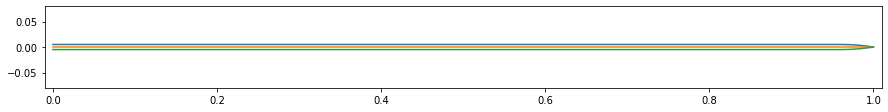

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,1.5))
plt.xlim(-0.01, 1.01)
plt.ylim(-0.08, 0.08)
plt.plot(xu,yu)
plt.plot(xm,ym)
plt.plot(xl,yl)
plt.show()

In [94]:
LEangle = 15
nptot = round(180/LEangle)
np1 = int(nptot/2)
np2 = nptot - np1
print(nptot, np1, np2)


12 6 6


In [102]:
alpha = 90
for i in range(np1):
    alpha = alpha - LEangle
    y = r * math.sin(alpha * math.pi/180)
    print(alpha,y)

75 0.004829629131445342
60 0.004330127018922193
45 0.0035355339059327372
30 0.0024999999999999996
15 0.0012940952255126037
0 0.0


In [103]:
alpha = 0
for i in range(np2-1):
    alpha = alpha + LEangle
    y = r * math.sin(alpha * math.pi/180)
    print(alpha,y)

15 0.0012940952255126037
30 0.0024999999999999996
45 0.0035355339059327372
60 0.004330127018922193
75 0.004829629131445342
